In [5]:
#importing data to pthon
import nltk
from itertools import islice
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt

def load_text(filename):
    my_text = list()
    with open(filename, encoding= "latin-1") as f:
        for line in islice(f, 0, None):
            my_text.append(line)
    my_text = [word_tokenize(sentence) for sentence in my_text]
    flat_list = [item for sublist in my_text for item in sublist]
    return flat_list

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [6]:
thacher = load_text('thacher-2021.txt')
otis = load_text('otis-2021.txt')
mayhew = load_text('mayhew2-2021.txt')

In [7]:
#Removing stopwords
def prepare_text(list_of_words):
  #load stopwords:
  stops = stopwords.words('english')
  #transform all word characters to lower case:
  list_of_words = [word.lower() for word in list_of_words]
  #remove all words containing up to two characters:
  list_of_words = [word for word in list_of_words if len(word)>2]
  #remove stopwords:
  list_of_words = [word for word in list_of_words if word not in stops]
  return list_of_words

In [8]:
thacher_prepared = prepare_text(thacher)
otis_prepared = prepare_text(otis)
mayhew_prepared = prepare_text(mayhew)

In [9]:
#How to count words in a list using python
def count_freq(my_list):
    unique_words = []
    counts = []
    # create a list of unique words:
    for item in my_list:
      if item not in unique_words: 
        unique_words.append(item)
    # count the frequency of each word:
    for word in unique_words:
      count = 0
      for i in my_list:
        if word == i:
          count += 1
      counts.append(count)
    # create a dataframe with the words and their frequencies:
    df = pd.DataFrame({"word": unique_words, "count": counts})
    df.sort_values(by="count", inplace = True, ascending = False)
    df.reset_index(drop=True, inplace = True)
    return df

thacher_df = count_freq(thacher_prepared)
otis_df = count_freq(otis_prepared)
mayhew_df = count_freq(mayhew_prepared)

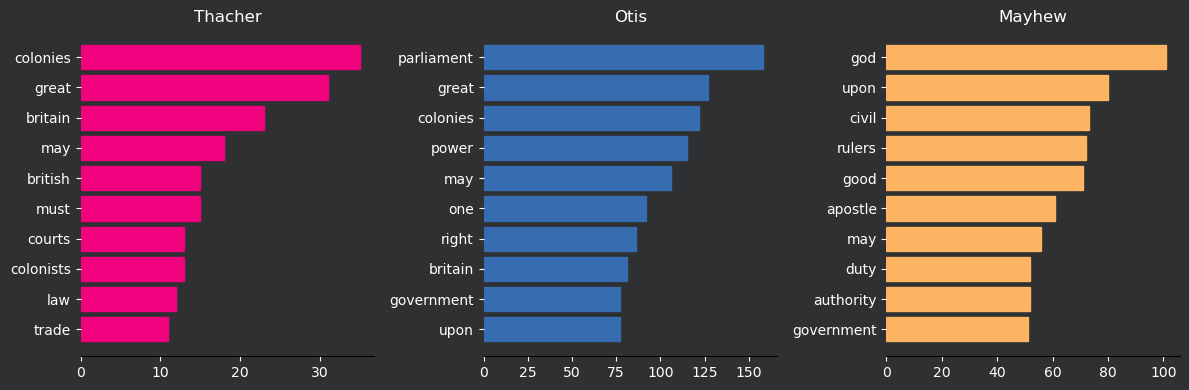

In [10]:
#word count visualisation
thacher_10 =thacher_df.iloc[:10]
otis_10 = otis_df.iloc[:10]
mayhew_10 = mayhew_df.iloc[:10]

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12, 4))

# horizontal barplot:

ax1.barh(thacher_10["word"], thacher_10["count"], 
        color = "#f0027f", 
        edgecolor = "#f0027f")

ax2.barh(otis_10["word"], otis_10["count"], 
        color = "#386cb0", 
        edgecolor = "#386cb0")

ax3.barh(mayhew_10["word"], mayhew_10["count"], 
        color = "#fdb462", 
        edgecolor = "#fdb462")

# title:
ax1.set_title("Thacher")
ax2.set_title("Otis")
ax3.set_title("Mayhew")

# iterate over ax1, ax2, ax3 to: 
# invert the y axis;
# eliminate grid;
# set fonts and background colors;
# eliminate spines;
for ax in fig.axes:                             
    ax.invert_yaxis()                           
    ax.grid(False)                              
    ax.title.set_color('white')                 
    ax.tick_params(axis='x', colors='white')    
    ax.tick_params(axis='y', colors='white')    
    ax.set_facecolor('#2E3031')                 
    ax.spines["top"].set_visible(False)         
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

# fig background color:
fig.patch.set_facecolor('#2E3031')
# layout:
fig.tight_layout()

plt.show()

In [11]:
#Calculate the proportion of each word and comparing the manifests
thacher_df["proportion"] = thacher_df["count"]/sum(thacher_df["count"])
otis_df["proportion"] = otis_df["count"]/sum(otis_df["count"])
mayhew_df["proportion"] = mayhew_df["count"]/sum(mayhew_df["count"])

thacher_otis = thacher_df[["word", "proportion"]].merge(
    otis_df[["word", "proportion"]], 
    on = "word", 
    how = "outer", 
    suffixes = ("_thacher", "_otis")).fillna(0)

thacher_mayhew = thacher_df[["word", "proportion"]].merge(
    mayhew_df[["word", "proportion"]],
    on = "word",
    how = "outer",
    suffixes = ("_thacher", "_mayhew")).fillna(0)

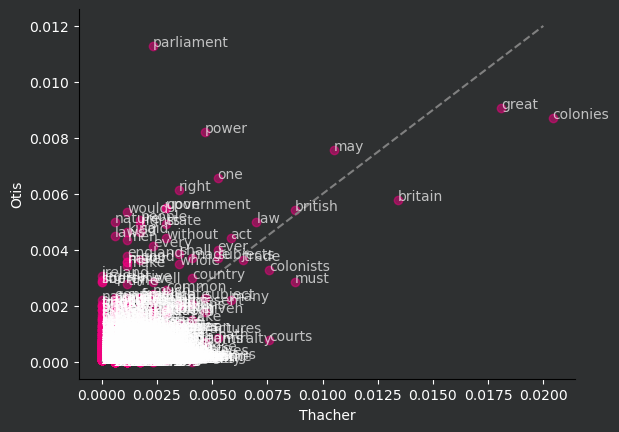

In [12]:
fig, ax = plt.subplots()

# scatterplot:
ax.scatter(thacher_otis["proportion_thacher"], thacher_otis["proportion_otis"], color = "#f0027f", alpha = 0.5)

# annotate words:
for i, txt in enumerate(thacher_otis["word"]):
    ax.annotate(txt, 
                (thacher_otis["proportion_thacher"][i], 
                 thacher_otis["proportion_otis"][i]), 
                 color = "white", 
                 alpha = 0.7)
    
# eliminate grid:
ax.grid(False)

# x axis label:
ax.set_xlabel("Thacher")

# y axis label:
ax.set_ylabel("Otis")

# diagonal dashed line:
ax.plot([0, 0.02], [0, 0.012], color = "gray", linestyle = "--")

# fig background color:
fig.patch.set_facecolor('#2E3031')

# ax background color:
ax.set_facecolor('#2E3031')

# x and y axes labels font color to white:
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')


# ax font colors set to white:
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# set spines to false:
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

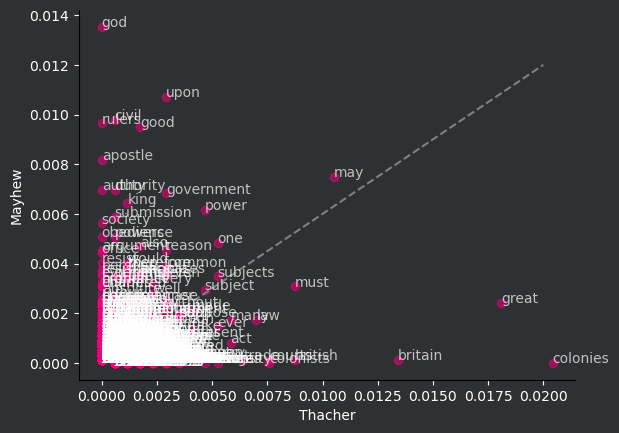

In [13]:
# plot scatterplot with words:
fig, ax = plt.subplots()

ax.scatter(thacher_mayhew["proportion_thacher"], 
           thacher_mayhew["proportion_mayhew"], 
           color = "#f0027f", 
           alpha = 0.5)

for i, txt in enumerate(thacher_mayhew["word"]):
    ax.annotate(txt, (thacher_mayhew["proportion_thacher"][i], 
                      thacher_mayhew["proportion_mayhew"][i]), 
                      color = "white", 
                      alpha = 0.7)
# eliminate grid:
ax.grid(False)
# x axis label:
ax.set_xlabel("Thacher")
# y axis label:
ax.set_ylabel("Mayhew")
# diagonal dashed line:
ax.plot([0, 0.02], [0, 0.012], 
        color = "gray", 
        linestyle = "--")

# fig background color:
fig.patch.set_facecolor('#2E3031')

# ax background color:
ax.set_facecolor('#2E3031')

# x and y axes labels font color to white:
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')


# ax font colors set to white:
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# set spines to false:
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)